# Importing the libraries

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from featurewiz import featurewiz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

Imported version = 0.1.55.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


# Loading the dataset

In [171]:
bike_data = pd.read_csv("bike_crash-B-PF307G4M.csv")
bike_data

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No Data,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,40,Dry,Signal Light,Not Worn
2459,No,No,True,No Data,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Not Worn
2460,No,No,True,No Data,No,Not Injured,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,30,Wet,Signal Light,Not Worn
2461,Yes,No,True,No Data,No,Non-Incapacitating Injury,930,1,2017,Friday,Intersection,Main/Proper Lane,-1,Dry,Stop Sign,"Worn, Unk Damage"


# Descriptive Analysis

In [34]:
#displaying the number of rows and columns of the dataset
print("Total number of Rows and Columns:",bike_data.shape)

#displaying the data field values
print("\nColumn Names:\n",bike_data.columns)

Total number of Rows and Columns: (2463, 16)

Column Names:
 Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')


In [35]:
#displaying the data types
print("\nData types:\n", bike_data.dtypes)


Data types:
 $1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Construction Zone Flag                       object
Crash Severity                               object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
dtype: object


In [36]:
#information about the dataframe
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   At Intersection Flag                       2463 non-null   bool  
 3   Average Daily Traffic Amount               2463 non-null   object
 4   Construction Zone Flag                     2463 non-null   object
 5   Crash Severity                             2463 non-null   object
 6   Crash Time                                 2463 non-null   int64 
 7   Crash Total Injury Count                   2463 non-null   int64 
 8   Crash Year                                 2463 non-null   int64 
 9   Day of Week                                2463 non-null   object
 10  Intersection Related                

# Statistical Analysis

In [37]:
#describing the dataset
round(bike_data.describe(),1)

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
count,2463.0,2463.0,2463.0,2463.0
mean,1404.7,1.1,2013.4,26.4
std,559.0,1.2,2.2,17.0
min,1.0,0.0,2010.0,-1.0
25%,1008.0,1.0,2011.0,0.0
50%,1532.0,1.0,2013.0,30.0
75%,1822.5,1.0,2015.0,35.0
max,2358.0,15.0,2017.0,65.0


# Data Profiling Report

In [38]:
data_profile_report = bike_data.profile_report(title='Data Analysis Report', explorative = True, minimal=True, vars={"num": {"low_categorical_threshold": 0}})
data_profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
#saving the profile report 
data_profile_report.to_file(output_file="Data Analysis Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [153]:
#checking for null values in the each column of the dataset
for x in range(16):
    print("%-45s %10d" % (bike_data.columns.values[x], bike_data.iloc[:,x].isna().sum()))

$1000 Damage to Any One Person's Property              0
Active School Zone Flag                                0
At Intersection Flag                                   0
Average Daily Traffic Amount                           0
Construction Zone Flag                                 0
Crash Severity                                         0
Crash Time                                             0
Crash Total Injury Count                               0
Crash Year                                             0
Day of Week                                            0
Intersection Related                                   0
Roadway Part                                           0
Speed Limit                                            0
Surface Condition                                      0
Traffic Control Type                                   0
Person Helmet                                          0


In [172]:
# renaming field values

bike_data = bike_data.rename(columns = 
                    {
                        "$1000 Damage to Any One Person's Property" : "Damage to any persons property"
                    }
                )
bike_data.columns

Index(['Damage to any persons property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')

In [173]:
# replacing values

bike_data['Average Daily Traffic Amount'] = bike_data['Average Daily Traffic Amount'].replace(['No Data'], 0)
print("Replace Successful!")

Replace Successful!


In [174]:
# checking for wrong data types

bike_data.dtypes

bike_data['Damage to any persons property'] = bike_data['Damage to any persons property'].astype('bool')
bike_data['Average Daily Traffic Amount'] = bike_data['Average Daily Traffic Amount'].astype('int')
bike_data['Construction Zone Flag'] = bike_data['Construction Zone Flag'].astype('bool')
bike_data['Crash Total Injury Count'] = bike_data['Crash Total Injury Count'].astype('int')
bike_data['Intersection Related'] = bike_data['Intersection Related'].astype('category')
bike_data['Roadway Part'] = bike_data['Roadway Part'].astype('category')
bike_data['Speed Limit'] = bike_data['Speed Limit'].astype('int')
bike_data['Surface Condition'] = bike_data['Surface Condition'].astype('category')
bike_data['Traffic Control Type'] = bike_data['Traffic Control Type'].astype('category')
bike_data['Person Helmet'] = bike_data['Person Helmet'].astype('category')


print("Data type conversion successful!")

Data type conversion successful!


In [175]:
bike_data.dtypes

Damage to any persons property        bool
Active School Zone Flag             object
At Intersection Flag                  bool
Average Daily Traffic Amount         int32
Construction Zone Flag                bool
Crash Severity                      object
Crash Time                           int64
Crash Total Injury Count             int32
Crash Year                           int64
Day of Week                         object
Intersection Related              category
Roadway Part                      category
Speed Limit                          int32
Surface Condition                 category
Traffic Control Type              category
Person Helmet                     category
dtype: object

# Feature Selection & Extraction

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (2463, 16)
    Loaded train data. Shape = (2463, 16)
    Some column names had special characters which were removed...
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
###################################################

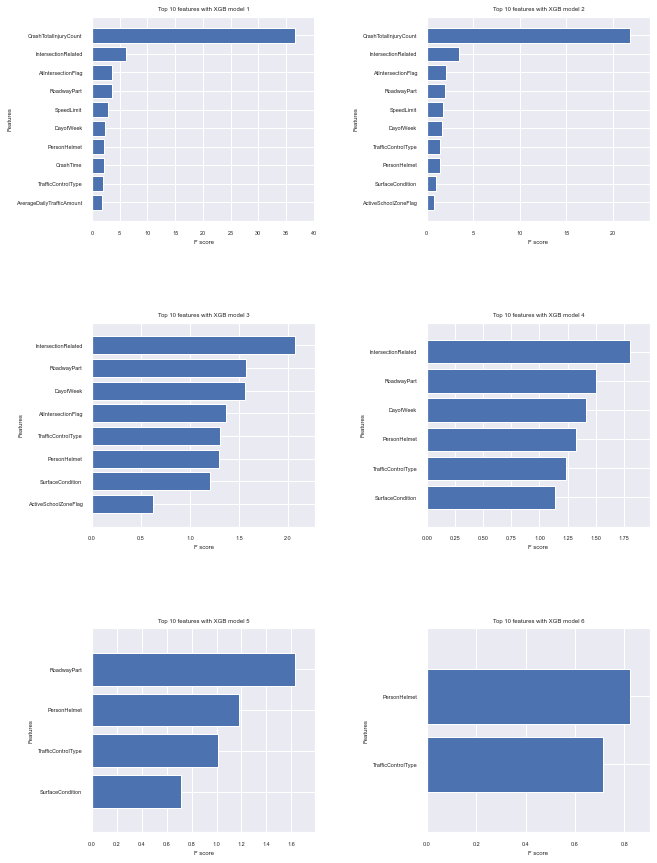

            Total time taken for XGBoost feature selection = 3 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 12 important features:
['CrashTotalInjuryCount', 'IntersectionRelated', 'AtIntersectionFlag', 'RoadwayPart', 'SpeedLimit', 'DayofWeek', 'PersonHelmet', 'CrashTime', 'TrafficControlType', 'AverageDailyTrafficAmount', 'SurfaceCondition', 'ActiveSchoolZoneFlag']

    Time taken for feature selection = 3 seconds
Returning 2 dataframes: dataname and test_data with 12 important features.


In [176]:
#automatic Feature Extraction

target = 'Crash Severity'

features, train = featurewiz(bike_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [62]:
print(features)

['CrashTotalInjuryCount', 'IntersectionRelated', 'AtIntersectionFlag', 'RoadwayPart', 'SpeedLimit', 'DayofWeek', 'PersonHelmet', 'CrashTime', 'TrafficControlType', 'AverageDailyTrafficAmount', 'SurfaceCondition', 'ActiveSchoolZoneFlag']


In [177]:
#grouping the categories

bike_data['Crash Severity'] = bike_data['Crash Severity'].replace(['Incapacitating Injury', 'Possible Injury', 'Killed'], 'Severity')
bike_data['Crash Severity'] = bike_data['Crash Severity'].replace(['Non-Incapacitating Injury', 'Not Injured'], 'Non Severe Incident')

print("Grouping Complete!")

Grouping Complete!


In [178]:
bike_data['Crash Severity']

0                  Severity
1       Non Severe Incident
2       Non Severe Incident
3       Non Severe Incident
4       Non Severe Incident
               ...         
2458    Non Severe Incident
2459    Non Severe Incident
2460    Non Severe Incident
2461    Non Severe Incident
2462    Non Severe Incident
Name: Crash Severity, Length: 2463, dtype: object

In [685]:
# new dataframe for correlation plot

new_data_corr = pd.DataFrame()

new_data_corr = bike_data
new_data_corr = new_data_corr.drop('Damage to any persons property', axis=1)
new_data_corr = new_data_corr.drop('Construction Zone Flag', axis=1)
new_data_corr = new_data_corr.drop('Damage to any persons property Labels', axis=1)

new_data_corr

,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,...,Surface Condition,Traffic Control Type,Person Helmet,Crash Severity Labels,At Intersection Flag Labels,Intersection Related Labels,Roadway Part Labels,Surface Condition Labels,Traffic Control Type Labels,Person Helmet Labels
0,No,False,15262,Severity,239,1,2010,Friday,Non Intersection,Main/Proper Lane,...,Dry,Marked Lanes,"Worn, Damaged",1,0,3,1,0,6,2
1,No,False,0,Non Severe Incident,310,2,2010,Friday,Non Intersection,Main/Proper Lane,...,Dry,Center Stripe/Divider,Not Worn,0,0,3,1,0,1,0
2,No,False,0,Non Severe Incident,310,2,2010,Friday,Non Intersection,Main/Proper Lane,...,Dry,Center Stripe/Divider,Not Worn,0,0,3,1,0,1,0
3,No,False,0,Non Severe Incident,310,2,2010,Friday,Non Intersection,Main/Proper Lane,...,Dry,Center Stripe/Divider,Not Worn,0,0,3,1,0,1,0
4,No,False,22775,Non Severe Incident,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,...,Dry,None,Not Worn,0,0,2,1,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,True,0,Non Severe Incident,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,...,Dry,Signal Light,Not Worn,0,1,2,1,0,11,0
2459,No,True,0,Non Severe Incident,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,...,Dry,Center Stripe/Divider,Not Worn,0,1,3,1,0,1,0
2460,No,True,0,Non Severe Incident,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,...,Wet,Signal Light,Not Worn,0,1,2,1,6,11,0
2461,No,True,0,Non Severe Incident,930,1,2017,Friday,Intersection,Main/Proper Lane,...,Dry,Stop Sign,"Worn, Unk Damage",0,1,1,1,0,13,4


# Correlation Plot

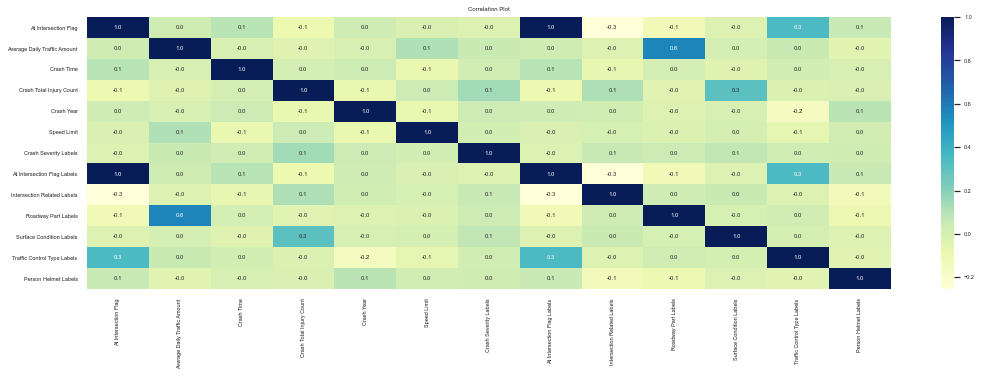

In [688]:
#plotting correlation matrix 

plt.figure(figsize = (18,5))
ax = plt.subplot()
sns.heatmap(new_data_corr.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot');

# Label Encoding

In [179]:
# Label Encoding for Predictor Variable

labelencoder = LabelEncoder()

bike_data['Crash Severity Labels'] = labelencoder.fit_transform(bike_data["Crash Severity"])

In [159]:
bike_data

,Damage to any persons property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet,Crash Severity Labels
0,No,No,False,15262,No,Severity,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged",1
1,No,No,False,0,No,Non Severe Incident,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
2,No,No,False,0,No,Non Severe Incident,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
3,No,No,False,0,No,Non Severe Incident,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
4,No,No,False,22775,No,Non Severe Incident,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,0,No,Non Severe Incident,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,40,Dry,Signal Light,Not Worn,0
2459,No,No,True,0,No,Non Severe Incident,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Not Worn,0
2460,No,No,True,0,No,Non Severe Incident,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,30,Wet,Signal Light,Not Worn,0
2461,Yes,No,True,0,No,Non Severe Incident,930,1,2017,Friday,Intersection,Main/Proper Lane,-1,Dry,Stop Sign,"Worn, Unk Damage",0


In [180]:
# Label Encoding for independent variables

bike_data['Damage to any persons property Labels'] = labelencoder.fit_transform(bike_data["Damage to any persons property"])
bike_data['At Intersection Flag Labels'] = labelencoder.fit_transform(bike_data["At Intersection Flag"])
bike_data['Intersection Related Labels'] = labelencoder.fit_transform(bike_data["Intersection Related"])
bike_data['Roadway Part Labels'] = labelencoder.fit_transform(bike_data["Roadway Part"])
bike_data['Surface Condition Labels'] = labelencoder.fit_transform(bike_data["Surface Condition"])
bike_data['Traffic Control Type Labels'] = labelencoder.fit_transform(bike_data["Traffic Control Type"])
bike_data['Person Helmet Labels'] = labelencoder.fit_transform(bike_data["Person Helmet"])

In [689]:
bike_data

,Damage to any persons property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Traffic Control Type,Person Helmet,Crash Severity Labels,Damage to any persons property Labels,At Intersection Flag Labels,Intersection Related Labels,Roadway Part Labels,Surface Condition Labels,Traffic Control Type Labels,Person Helmet Labels
0,True,No,False,15262,True,Severity,239,1,2010,Friday,...,Marked Lanes,"Worn, Damaged",1,0,0,3,1,0,6,2
1,True,No,False,0,True,Non Severe Incident,310,2,2010,Friday,...,Center Stripe/Divider,Not Worn,0,0,0,3,1,0,1,0
2,True,No,False,0,True,Non Severe Incident,310,2,2010,Friday,...,Center Stripe/Divider,Not Worn,0,0,0,3,1,0,1,0
3,True,No,False,0,True,Non Severe Incident,310,2,2010,Friday,...,Center Stripe/Divider,Not Worn,0,0,0,3,1,0,1,0
4,True,No,False,22775,True,Non Severe Incident,2300,1,2010,Monday,...,None,Not Worn,0,0,0,2,1,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,True,No,True,0,True,Non Severe Incident,1254,1,2017,Tuesday,...,Signal Light,Not Worn,0,0,1,2,1,0,11,0
2459,True,No,True,0,True,Non Severe Incident,2048,1,2017,Tuesday,...,Center Stripe/Divider,Not Worn,0,0,1,3,1,0,1,0
2460,True,No,True,0,True,Non Severe Incident,737,0,2017,Thursday,...,Signal Light,Not Worn,0,0,1,2,1,6,11,0
2461,True,No,True,0,True,Non Severe Incident,930,1,2017,Friday,...,Stop Sign,"Worn, Unk Damage",0,0,1,1,1,0,13,4


# New dataframe for LR model

In [629]:
# creating new dataframe

new_bike_data = pd.DataFrame()

#new_bike_data['Damage to any persons property Labels'] = bike_data['Damage to any persons property Labels']
#new_bike_data['At Intersection Flag Labels'] = bike_data['At Intersection Flag Labels']
new_bike_data['Average Daily Traffic Amount'] = bike_data['Average Daily Traffic Amount']
#new_bike_data['Crash Total Injury Count'] = bike_data['Crash Total Injury Count']                              # Highly Correlated with Surface Condition
#new_bike_data['Intersection Related Labels'] = bike_data['Intersection Related Labels']
#new_bike_data['Roadway Part Labels'] = bike_data['Roadway Part Labels']
new_bike_data['Speed Limit'] = bike_data['Speed Limit']
new_bike_data['Surface Condition Labels'] = bike_data['Surface Condition Labels']
new_bike_data['Traffic Control Type Labels'] = bike_data['Traffic Control Type Labels']
new_bike_data['Person Helmet Labels'] = bike_data['Person Helmet Labels']

In [690]:
new_bike_data.columns

Index(['Average Daily Traffic Amount', 'Speed Limit',
       'Surface Condition Labels', 'Traffic Control Type Labels',
       'Person Helmet Labels'],
      dtype='object')

# Correlation Plot

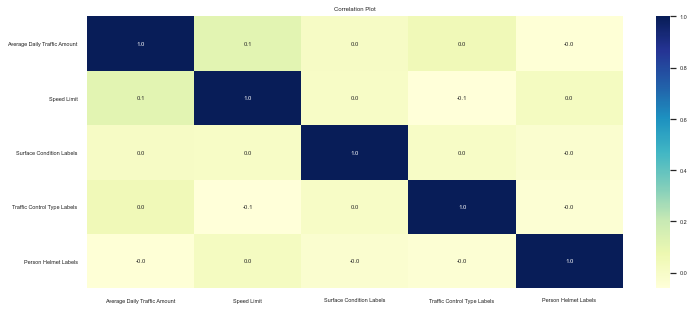

In [630]:
#plotting correlation matrix 

plt.figure(figsize = (12,5))
ax = plt.subplot()
sns.heatmap(new_bike_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot');

# Model Building

In [631]:
#extracting features and labels from the dataset

x = new_bike_data
y = bike_data['Crash Severity Labels']

In [632]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1970, 5)
(493, 5)


# Logistic Regression

In [633]:
#logistic regression model

logisticregression_model = LogisticRegression()
logisticregression_model.fit(X_train, y_train)

LogisticRegression()

In [634]:
#prediction result of the model

predicted_LR = logisticregression_model.predict(X_test)

In [635]:
#accuracy of the logistic regression model for training and testing set

print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logisticregression_model.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set:     {:.2f}'.format(logisticregression_model.score(X_test, y_test)))

testaccuracy_LR = logisticregression_model.score(X_test, y_test)
print(testaccuracy_LR)

Accuracy of Logistic Regression on training set: 0.66
Accuracy of Logistic Regression on test set:     0.66
0.6612576064908722


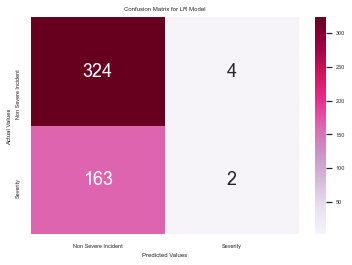

In [636]:
#confusion matrix for LR Model

confusion_matrix_LR = confusion_matrix(y_test, predicted_LR)

fig = sns.heatmap(confusion_matrix_LR, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd', fmt='g')
fig.xaxis.set_ticklabels(['Non Severe Incident','Severity'])
fig.yaxis.set_ticklabels(['Non Severe Incident','Severity'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ')
fig.set_title('Confusion Matrix for LR Model')
sns.set(font_scale=0.5)

In [637]:
model = sm.Logit(endog=y, exog=x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.644172
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Crash Severity Labels   No. Observations:                 2463
Model:                             Logit   Df Residuals:                     2458
Method:                              MLE   Df Model:                            4
Date:                   Wed, 15 Jun 2022   Pseudo R-squ.:               -0.009814
Time:                           15:36:23   Log-Likelihood:                -1586.6
converged:                          True   LL-Null:                       -1571.2
Covariance Type:               nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Average Daily Traffic Amount  2.687e-06   1.29e-

# Classification Report

In [638]:
#classification report for LR Model

print("\n Classification report %s:\n%s\n" % (logisticregression_model, metrics.classification_report(y_test, predicted_LR)))


 Classification report LogisticRegression():
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       328
           1       0.33      0.01      0.02       165

    accuracy                           0.66       493
   macro avg       0.50      0.50      0.41       493
weighted avg       0.55      0.66      0.54       493




# New dataframe for DT model

In [691]:
# creating new dataframe

new_bike_data_dt = pd.DataFrame()

#new_bike_data_dt['Damage to any persons property Labels'] = bike_data['Damage to any persons property Labels']
new_bike_data_dt['At Intersection Flag Labels'] = bike_data['At Intersection Flag Labels']                          
new_bike_data_dt['Average Daily Traffic Amount'] = bike_data['Average Daily Traffic Amount']
#new_bike_data_dt['Crash Total Injury Count'] = bike_data['Crash Total Injury Count']                                                   
new_bike_data_dt['Intersection Related Labels'] = bike_data['Intersection Related Labels']
#new_bike_data_dt['Roadway Part Labels'] = bike_data['Roadway Part Labels']                                         
new_bike_data_dt['Speed Limit'] = bike_data['Speed Limit']
new_bike_data_dt['Surface Condition Labels'] = bike_data['Surface Condition Labels']                               
new_bike_data_dt['Traffic Control Type Labels'] = bike_data['Traffic Control Type Labels']
new_bike_data_dt['Person Helmet Labels'] = bike_data['Person Helmet Labels']

In [693]:
new_bike_data_dt.columns

Index(['At Intersection Flag Labels', 'Average Daily Traffic Amount',
       'Intersection Related Labels', 'Speed Limit',
       'Surface Condition Labels', 'Traffic Control Type Labels',
       'Person Helmet Labels'],
      dtype='object')

In [668]:
#extracting features and labels from the dataset

x = new_bike_data_dt
y = bike_data['Crash Severity Labels']

In [669]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1970, 7)
(493, 7)


# Decision Tree Classifier

In [670]:
#decision tree classifier

decisiontree_model = DecisionTreeClassifier(max_depth = 4 , random_state = 42)
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

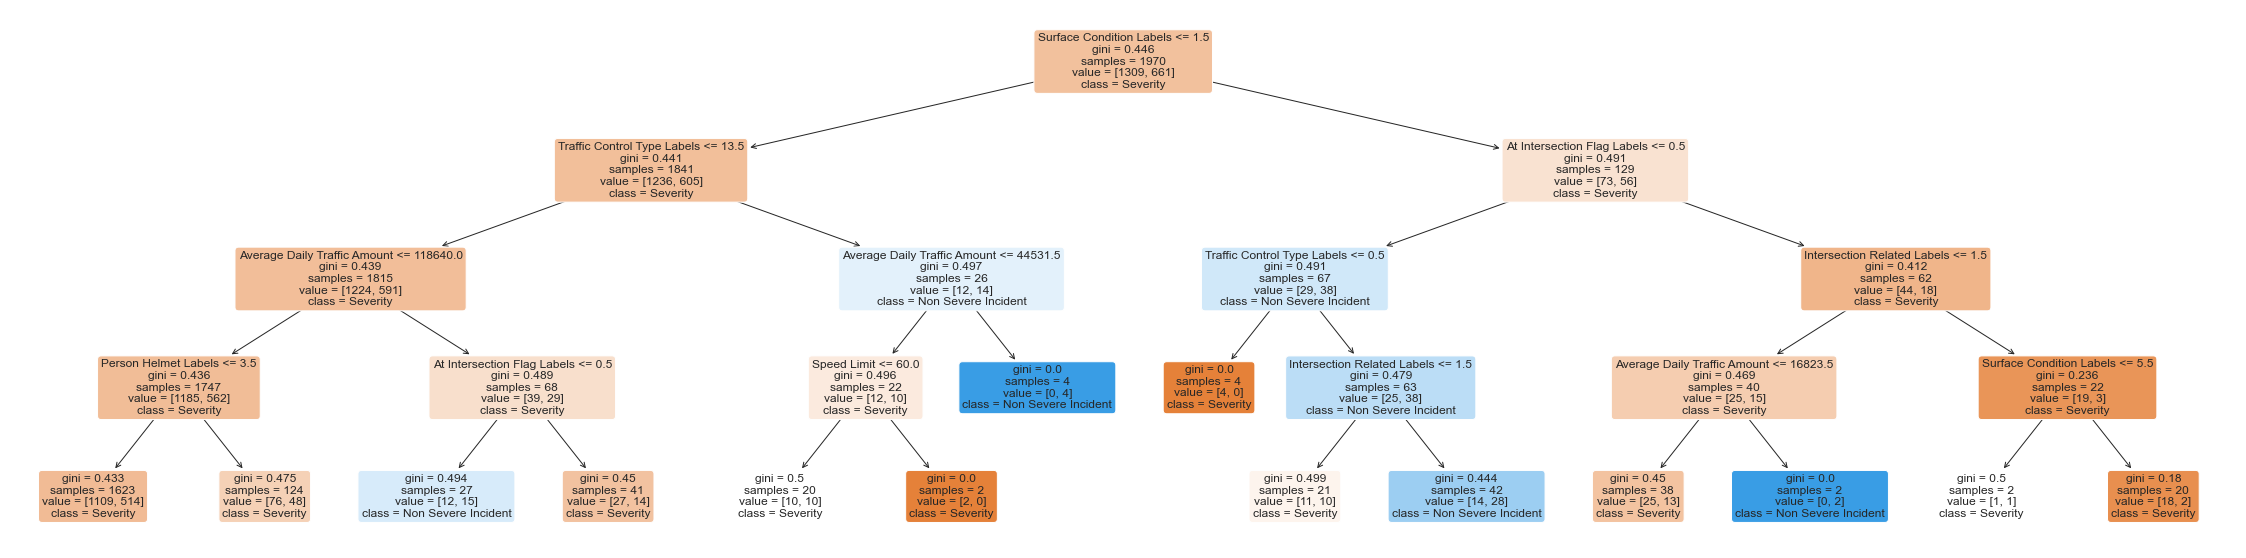

In [696]:
#plotting the decision tree

feature_names = x.columns

plt.figure(figsize=(40,10))
a = tree.plot_tree(decisiontree_model,
                   feature_names = feature_names,
                   class_names = bike_data['Crash Severity'],
                   rounded = True,
                   filled = True,
                   fontsize=12)
plt.show()

In [672]:
#prediction result of the model

predicted_descisiontree = decisiontree_model.predict(X_test)

In [673]:
#accuracy of the decision tree classifier for training and testing set

print('Accuracy of Decision Tree on training set: {:.2f}'.format(decisiontree_model.score(X_train, y_train)))
print('Accuracy of Decision Tree on test set:     {:.2f}'.format(decisiontree_model.score(X_test, y_test)))

testaccuracy_decisiontree = decisiontree_model.score(X_test, y_test)
print(testaccuracy_decisiontree)

Accuracy of Decision Tree on training set: 0.68
Accuracy of Decision Tree on test set:     0.67
0.6734279918864098


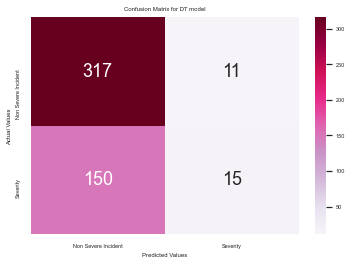

In [674]:
#confusion matrix for Decision Tree Model

confusion_matrix_dt = confusion_matrix(y_test, predicted_descisiontree)

fig = sns.heatmap(confusion_matrix_dt, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd', fmt='g')
fig.xaxis.set_ticklabels(['Non Severe Incident','Severity'])
fig.yaxis.set_ticklabels(['Non Severe Incident','Severity'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ')
fig.set_title('Confusion Matrix for DT model')
sns.set(font_scale=0.5)

In [675]:
#classification report for DT Model

print("\n Classification report %s:\n%s\n" % (decisiontree_model, metrics.classification_report(y_test, predicted_descisiontree)))


 Classification report DecisionTreeClassifier(max_depth=4, random_state=42):
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       328
           1       0.58      0.09      0.16       165

    accuracy                           0.67       493
   macro avg       0.63      0.53      0.48       493
weighted avg       0.64      0.67      0.58       493




# Feature Importance for DT Model

In [676]:
#extracting feature importance

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance' : np.round(decisiontree_model.feature_importances_, 3)})
feature_importance.sort_values('Importance', ascending=False, inplace = True)
print(feature_importance)

                        Feature  Importance
0   At Intersection Flag Labels       0.262
1  Average Daily Traffic Amount       0.208
5   Traffic Control Type Labels       0.206
4      Surface Condition Labels       0.133
2   Intersection Related Labels       0.107
6          Person Helmet Labels       0.047
3                   Speed Limit       0.037


<AxesSubplot:>

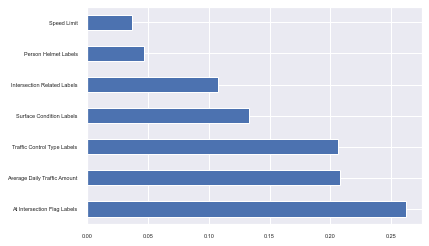

In [677]:
(pd.Series(decisiontree_model.feature_importances_, index=x.columns)
   .nlargest(7)
   .plot(kind='barh'))

# New dataframe for RF model

In [653]:
# creating new dataframe

new_bike_data_rf = pd.DataFrame()

new_bike_data_rf['Damage to any persons property Labels'] = bike_data['Damage to any persons property Labels']
new_bike_data_rf['At Intersection Flag Labels'] = bike_data['At Intersection Flag Labels']                          # highly correlated with traffic control
#new_bike_data_rf['Average Daily Traffic Amount'] = bike_data['Average Daily Traffic Amount']                       # correlated with speed limit
#new_bike_data_rf['Crash Total Injury Count'] = bike_data['Crash Total Injury Count']                               # highly correlated with surface condition                    
new_bike_data_rf['Intersection Related Labels'] = bike_data['Intersection Related Labels']
#new_bike_data_rf['Roadway Part Labels'] = bike_data['Roadway Part Labels']                                         # highly correlated with average daily traffic
new_bike_data_rf['Speed Limit'] = bike_data['Speed Limit']                                                          
new_bike_data_rf['Surface Condition Labels'] = bike_data['Surface Condition Labels']                               
#new_bike_data_rf['Traffic Control Type Labels'] = bike_data['Traffic Control Type Labels']
new_bike_data_rf['Person Helmet Labels'] = bike_data['Person Helmet Labels']

In [697]:
new_bike_data_rf.columns

Index(['Damage to any persons property Labels', 'At Intersection Flag Labels',
       'Intersection Related Labels', 'Speed Limit',
       'Surface Condition Labels', 'Person Helmet Labels'],
      dtype='object')

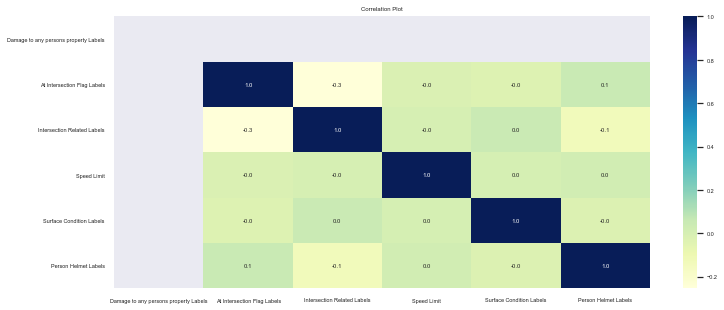

In [654]:
#plotting correlation matrix 

plt.figure(figsize = (12,5))
ax = plt.subplot()
sns.heatmap(new_bike_data_rf.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot');

In [655]:
#extracting features and labels from the dataset

x = new_bike_data_rf
y = bike_data['Crash Severity Labels']

In [656]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1970, 6)
(493, 6)


# Random Forest Classifier

In [657]:
#random forest classifier

randomforest_model = RandomForestClassifier(n_estimators=5000 ,max_depth = 4 , random_state = 42)
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=5000, random_state=42)

In [658]:
#prediction result of the model

predicted_randomforest = randomforest_model.predict(X_test)

In [659]:
#accuracy of the random forest classifier for training and testing set

print('Accuracy of Random Forest on training set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))
print('Accuracy of Random Forest on test set:     {:.2f}'.format(randomforest_model.score(X_test, y_test)))

testaccuracy_randomforest = randomforest_model.score(X_test, y_test)
print(testaccuracy_randomforest)

Accuracy of Random Forest on training set: 0.67
Accuracy of Random Forest on test set:     0.67
0.6734279918864098


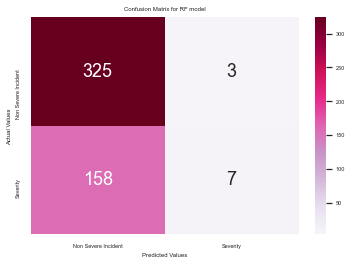

In [660]:
#confusion matrix for Random Forest Model

confusion_matrix_rf = confusion_matrix(y_test, predicted_randomforest)

fig = sns.heatmap(confusion_matrix_rf, annot=True,  annot_kws={"size": 18}, cmap = 'PuRd', fmt='g')
fig.xaxis.set_ticklabels(['Non Severe Incident','Severity'])
fig.yaxis.set_ticklabels(['Non Severe Incident','Severity'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ')
fig.set_title('Confusion Matrix for RF model')
sns.set(font_scale=0.5)

In [661]:
#classification report for RF Model

print("\n Classification report %s:\n%s\n" % (randomforest_model, metrics.classification_report(y_test, predicted_randomforest)))


 Classification report RandomForestClassifier(max_depth=4, n_estimators=5000, random_state=42):
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       328
           1       0.70      0.04      0.08       165

    accuracy                           0.67       493
   macro avg       0.69      0.52      0.44       493
weighted avg       0.68      0.67      0.56       493




# Feature Importance for RF Model

In [662]:
#extracting feature importance

feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance' : np.round(randomforest_model.feature_importances_, 3)})
feature_importance_rf.sort_values('Importance', ascending=False, inplace = True)
print(feature_importance_rf)

                                 Feature  Importance
3                            Speed Limit       0.281
5                   Person Helmet Labels       0.214
4               Surface Condition Labels       0.202
2            Intersection Related Labels       0.181
1            At Intersection Flag Labels       0.121
0  Damage to any persons property Labels       0.000


<AxesSubplot:>

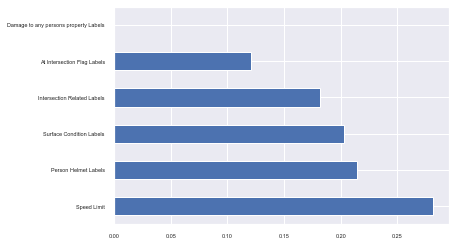

In [665]:
(pd.Series(randomforest_model.feature_importances_, index=x.columns)
   .nlargest(7)
   .plot(kind='barh'))